In [1]:
! pip install tensorflow-gpu

     |████████████████████████████████| 345.2MB 62kB/s 


In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('MNIST_DATA/',one_hot=True)

Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [10]:
mnist.train.num_examples

55000

In [11]:
mnist.train.images.shape

(55000, 784)

In [0]:
test_pic=mnist.train.images[1].reshape(28,28)

In [0]:
import matplotlib.pyplot as plt

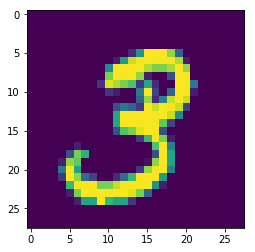

In [24]:
plt.imshow(test_pic)

In [25]:
test_pic.max()

1.0

In [26]:
test_pic.min()

0.0

In [0]:
## place holder

x=tf.placeholder(tf.float32,shape=[None,784]) ##(row x column)

In [0]:
## variable
W = tf.Variable(tf.zeros([784,10]))   ##(row x column)
b = tf.Variable(tf.zeros([10]))

In [0]:
## main graph operation
y = tf.matmul(x,W)+b

In [0]:
## loss function

y_true = tf.placeholder(tf.float32,[None,10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [0]:
## optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.5)

In [0]:
train = optimizer.minimize(cross_entropy)

In [0]:
init = tf.global_variables_initializer()

In [50]:
with tf.Session() as sess:
  sess.run(init)
  
  for step in range(1000):
    batch_x,batch_y=mnist.train.next_batch(100)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
  
  
  
  ## Evaluate model
  correct_prediction = tf.equal(tf.argmax(y,1),tf.arg_max(y_true,1))
  
  acc =tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
  
  ## this accuracy is also a graph
  
  print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9149


<tf.Tensor 'Mean_1:0' shape=() dtype=float32>